In [31]:
## install nltk 
!pip install nltk

In [33]:
import nltk
import textblob
from textblob import download_corpora

# Download NLTK + TextBlob resources (only once needed)
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')   # <- NEW FIX for your error
download_corpora.download_all()  # <- Fixes TextBlob MissingCorpusError


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tauhid\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tauhid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tauhid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tauhid\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\tauhid\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\tauhid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package brown to
[

Columns in dataset: Index(['author', 'content', 'country', 'date_time', 'id', 'language',
       'latitude', 'longitude', 'number_of_likes', 'number_of_shares'],
      dtype='object')
Using text column: content


C:\Users\tauhid\AppData\Local\Temp\ipykernel_20992\4228184150.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Sentiment", palette="Set2")


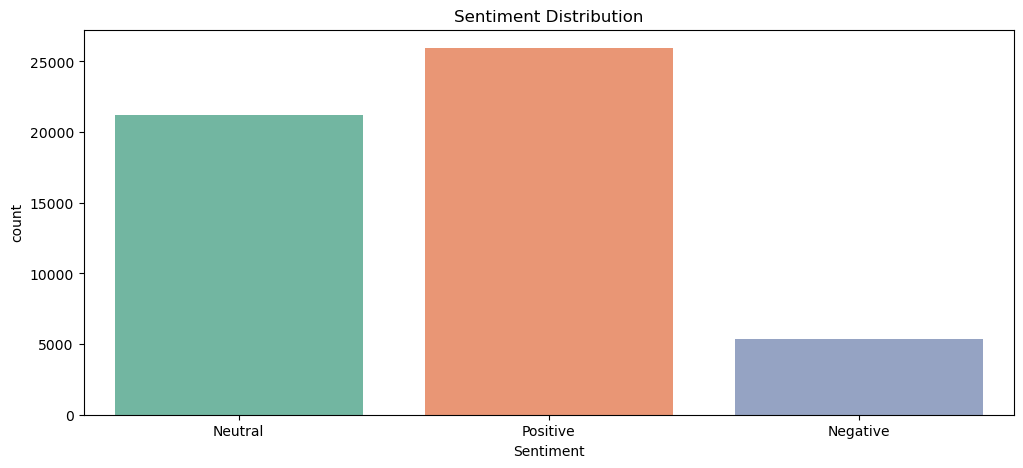

C:\Users\tauhid\AppData\Local\Temp\ipykernel_20992\4228184150.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Top_Emotion", palette="Set3", order=emotion_counts.index)


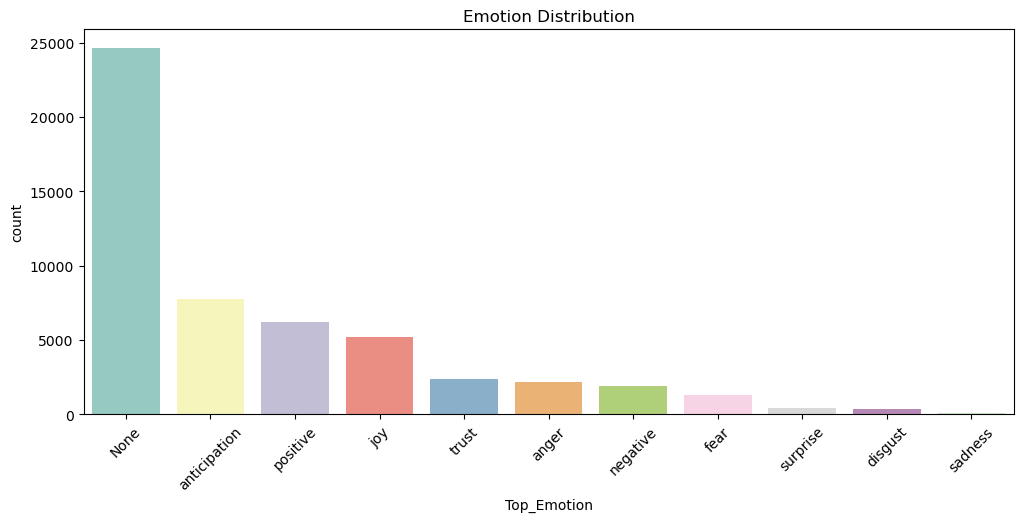

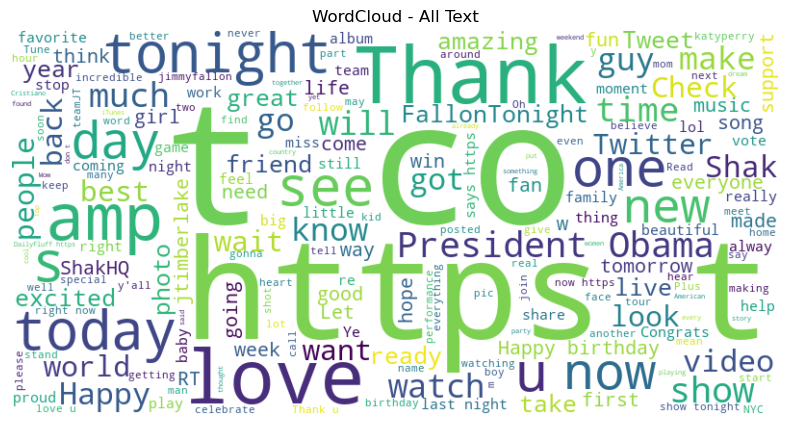

C:\Users\tauhid\AppData\Local\Temp\ipykernel_20992\4228184150.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq, x="Word", y="Frequency", palette="viridis")


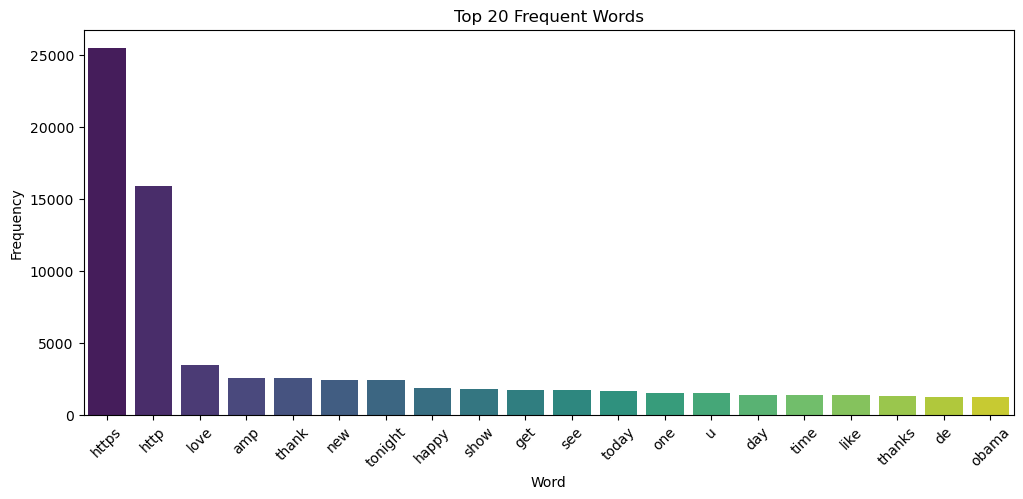

C:\Users\tauhid\AppData\Local\Temp\ipykernel_20992\4228184150.py:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_bigram, x="Bigram", y="Count", palette="magma")


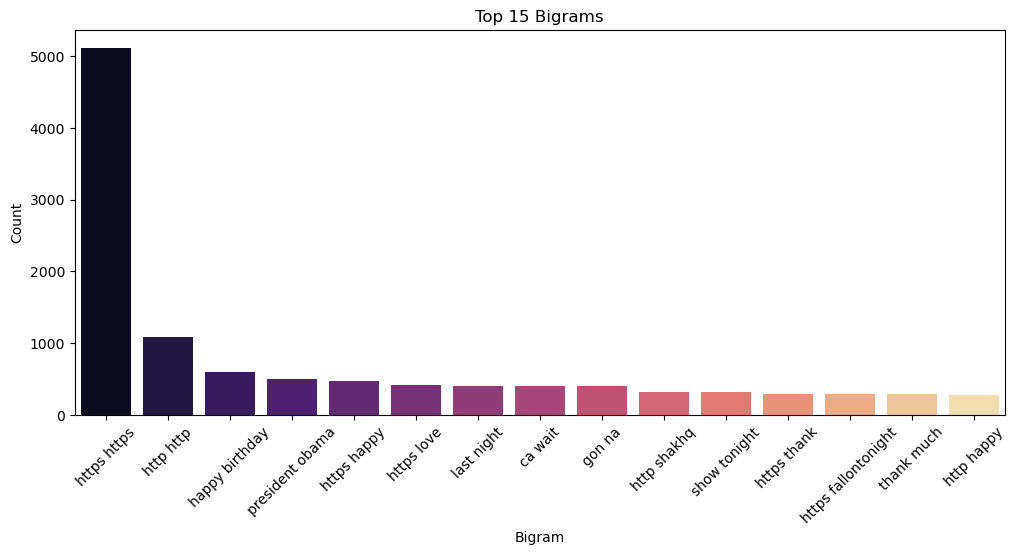

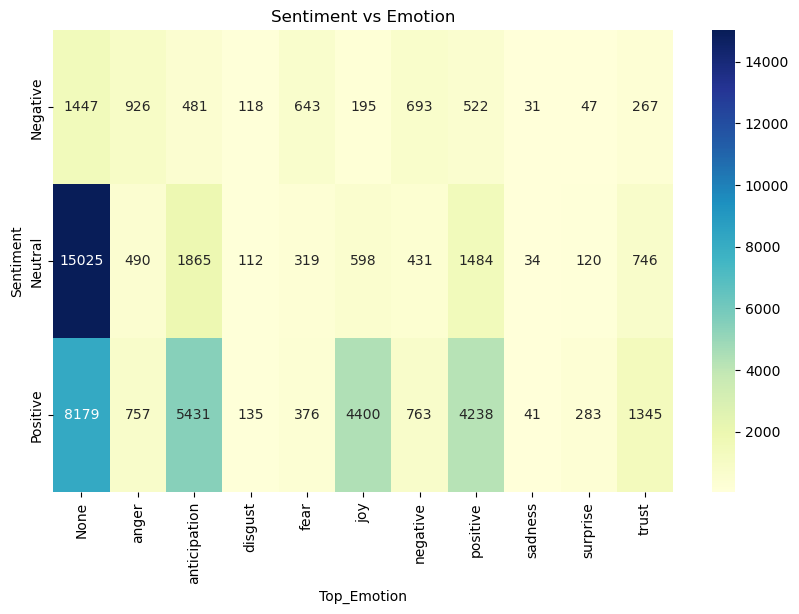

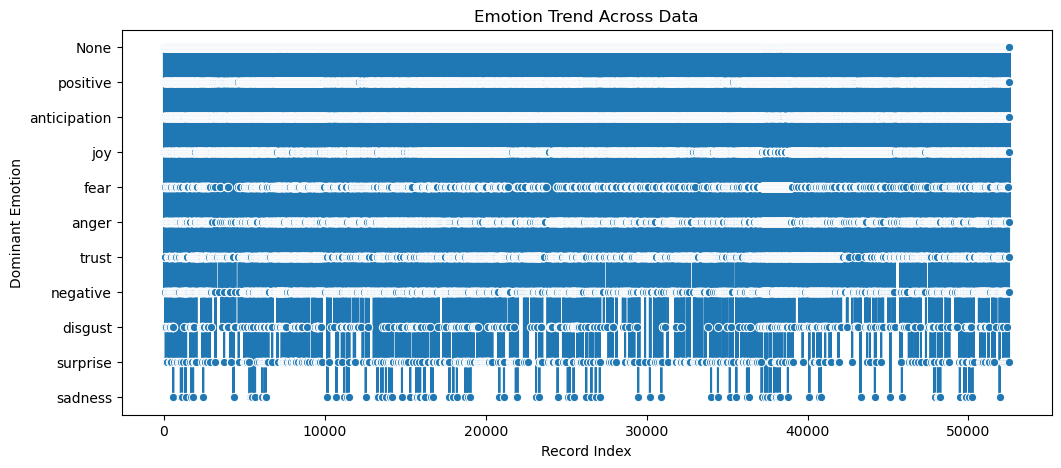

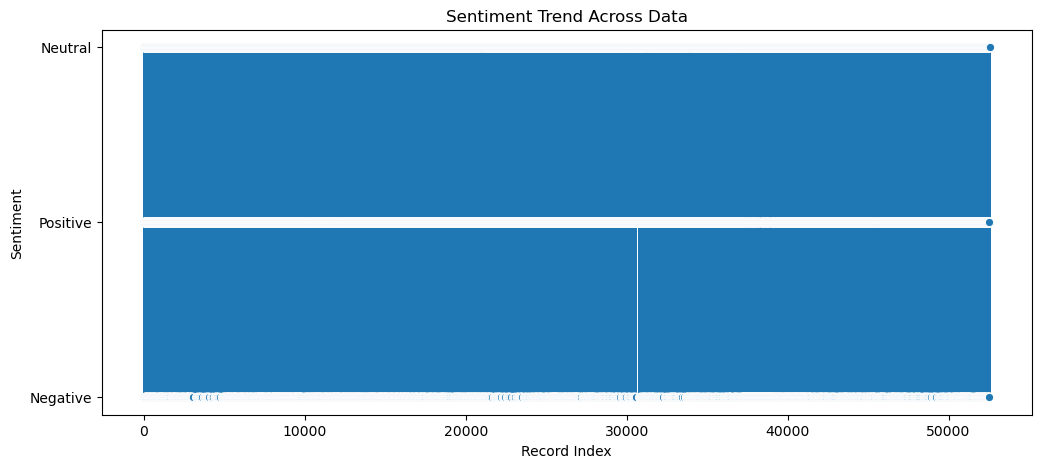


=== Public Opinion Summary ===
Sentiment
Positive    25948
Neutral     21224
Negative     5370
Name: count, dtype: int64

=== Dominant Emotions ===
Top_Emotion
None            24651
anticipation     7777
positive         6244
joy              5193
trust            2358
anger            2173
negative         1887
fear             1338
surprise          450
disgust           365
sadness           106
Name: count, dtype: int64


In [35]:
# ========================================
# Sentiment + Emotion + Extended Analysis
# ========================================

# 1. Import libraries
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nrclex import NRCLex
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams

## loads a list of English stopwords from NLTK
stop_words = set(stopwords.words("english"))

# ========================================
# 2. Load Dataset
# ========================================
data = pd.read_csv("tweets.csv")

print("Columns in dataset:", data.columns)

# Detect text column
possible_text_cols = ["text", "tweet", "message", "review", "content"]
text_col = None
for col in data.columns:
    if col.lower() in possible_text_cols:
        text_col = col
        break

if text_col is None:
    raise KeyError(
        f"No text column found. Please rename one column in your CSV to one of {possible_text_cols}.\n"
        f"Your CSV columns are: {list(data.columns)}"
    )

print("Using text column:", text_col)

# ========================================
# 3. Sentiment Analysis
# ========================================
sid = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sid.polarity_scores(str(text))["compound"]
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

data["Sentiment"] = data[text_col].apply(get_sentiment)

# ========================================
# 4. Emotion Detection
# ========================================
def get_emotions(text):
    emotion = NRCLex(str(text))
    return dict(emotion.raw_emotion_scores)

data["Emotions"] = data[text_col].apply(get_emotions)

def top_emotion(emotion_dict):
    if not emotion_dict:
        return "None"
    return max(emotion_dict, key=emotion_dict.get)

data["Top_Emotion"] = data["Emotions"].apply(top_emotion)

# ========================================
# 5. Counts
# ========================================
sentiment_counts = data["Sentiment"].value_counts()
emotion_counts = data["Top_Emotion"].value_counts()

# ========================================
# 6. Visualizations
# ========================================

# --- Sentiment Bar Plot
plt.figure(figsize=(12,5))
sns.countplot(data=data, x="Sentiment", palette="Set2")
plt.title("Sentiment Distribution")
plt.show()

# --- Emotion Bar Plot
plt.figure(figsize=(12,5))
sns.countplot(data=data, x="Top_Emotion", palette="Set3", order=emotion_counts.index)
plt.title("Emotion Distribution")
plt.xticks(rotation=45)
plt.show()

# --- WordCloud for All Text
all_text = " ".join(data[text_col].astype(str))
wordcloud_all = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_all, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - All Text")
plt.show()

# --- Frequent Words
words = [w.lower() for t in data[text_col].astype(str) for w in nltk.word_tokenize(t) if w.isalpha() and w.lower() not in stop_words]
word_freq = Counter(words).most_common(20)
df_word_freq = pd.DataFrame(word_freq, columns=["Word","Frequency"])

plt.figure(figsize=(12,5))
sns.barplot(data=df_word_freq, x="Word", y="Frequency", palette="viridis")
plt.title("Top 20 Frequent Words")
plt.xticks(rotation=45)
plt.show()

# --- Bigram Analysis
bigrams = Counter(ngrams(words, 2)).most_common(15)
df_bigram = pd.DataFrame([" ".join(b[0]) for b in bigrams], columns=["Bigram"])
df_bigram["Count"] = [b[1] for b in bigrams]

plt.figure(figsize=(12,5))
sns.barplot(data=df_bigram, x="Bigram", y="Count", palette="magma")
plt.title("Top 15 Bigrams")
plt.xticks(rotation=45)
plt.show()

# --- Sentiment vs Emotion Heatmap
cross_tab = pd.crosstab(data["Sentiment"], data["Top_Emotion"])
plt.figure(figsize=(10,6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Sentiment vs Emotion")
plt.show()

# --- Emotion Trend (if time/index available)
plt.figure(figsize=(12,5))
sns.lineplot(x=data.index, y=data["Top_Emotion"], marker="o")
plt.title("Emotion Trend Across Data")
plt.ylabel("Dominant Emotion")
plt.xlabel("Record Index")
plt.show()

# --- Sentiment Trend
plt.figure(figsize=(12,5))
sns.lineplot(x=data.index, y=data["Sentiment"], marker="o")
plt.title("Sentiment Trend Across Data")
plt.ylabel("Sentiment")
plt.xlabel("Record Index")
plt.show()

# ========================================
# 7. Insights
# ========================================
print("\n=== Public Opinion Summary ===")
print(sentiment_counts)

print("\n=== Dominant Emotions ===")
print(emotion_counts)

if sentiment_counts.get("Negative",0) > sentiment_counts.get("Positive",0):
    print("\n⚠ Customers are more negative. Suggest investigating complaints.")
if "joy" in emotion_counts.index[:3]:
    print("✅ Customers show Joy — can be used in marketing campaigns.")
if "anger" in emotion_counts.index[:3]:
    print("⚠ Anger detected — product improvement required.")
